In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image


In [23]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [24]:
imS = (224,224)
C = tf.keras.Sequential([
    hub.KerasLayer(classifier_url,input_shape=imS+(3,)),
])

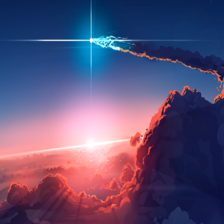

In [25]:
I = Image.open('../../images/desktop.png').resize(imS)
I

In [26]:
I = np.array(I)/255.0
I.shape

(224, 224, 3)

In [27]:
r = C.predict(I[np.newaxis,...])
r.shape

(1, 1001)

In [28]:
pc = np.argmax(r[0],axis=-1)
pc

981

In [29]:
lp = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [30]:
imnet_labels = np.array(open(lp).read().splitlines())

Text(0.5, 1.0, 'volcano')

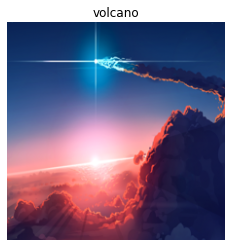

In [32]:
plt.imshow(I)
plt.axis('off')
pcn = imnet_labels[pc]
plt.title(pcn)

In [33]:
data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)


228827136/228813984 [==============================] - 47s 0us/step


In [34]:
ig = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
imData = ig.flow_from_directory(str(data_root),target_size=imS)

Found 3670 images belonging to 5 classes.


In [35]:
for imB, lbB in imData:
    print(imB.shape)
    print(lbB.shape)
    break

(32, 224, 224, 3)
(32, 5)


In [36]:
rB = C.predict(imB)
rB.shape

2022-03-13 09:38:31.786618: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


(32, 1001)

In [39]:
pcn = imnet_labels[np.argmax(rB,axis=-1)]
pcn

array(['feather boa', 'lakeside', 'daisy', 'rapeseed', 'greenhouse',
       'daisy', 'daisy', 'spider web', 'pot', 'daisy', 'daisy', 'bee',
       'greenhouse', 'fly', 'pot', 'daisy', 'acorn', 'orange', 'volcano',
       'daisy', 'bee', 'daisy', "yellow lady's slipper", 'bell pepper',
       'garden spider', 'daisy', 'wool', 'daisy', 'cabbage butterfly',
       'daisy', 'harvestman', "jack-o'-lantern"], dtype='<U30')

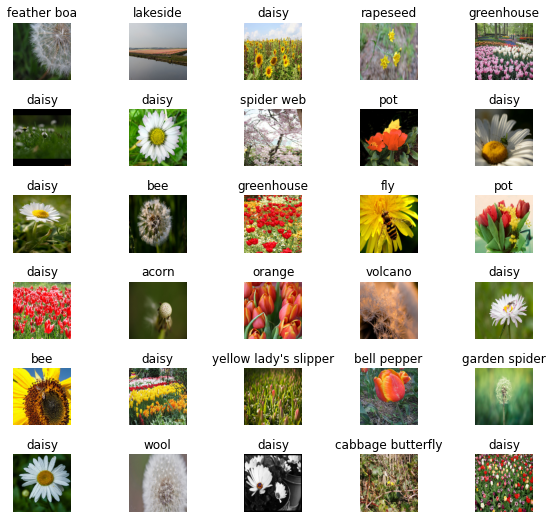

In [42]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    plt.title(pcn[i])
    plt.axis('off')


In [43]:
headLessModel_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2'

In [44]:
headLessModel = hub.KerasLayer(headLessModel_url,input_shape=imS+(3,))

In [45]:
fImB = headLessModel(imB)
fImB.shape

2022-03-13 10:01:13.858058: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 154140672 exceeds 10% of free system memory.


TensorShape([32, 1280])

In [46]:
headLessModel.trainable = False

In [47]:
newModel = tf.keras.Sequential([
    headLessModel,
    tf.keras.layers.Dense(imData.num_classes,activation='softmax')    
])

In [50]:
newModel.compile(
optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=['acc'])

In [52]:
newModel.fit(imData,epochs=10)

Epoch 1/10
115/115 [==============================] - 77s 667ms/step - loss: 0.2534 - acc: 0.9174
Epoch 2/10
115/115 [==============================] - 83s 719ms/step - loss: 0.2134 - acc: 0.9338
Epoch 3/10
115/115 [==============================] - 85s 736ms/step - loss: 0.1826 - acc: 0.9458
Epoch 4/10
115/115 [==============================] - 74s 646ms/step - loss: 0.1653 - acc: 0.9531
Epoch 5/10
115/115 [==============================] - 99s 855ms/step - loss: 0.1486 - acc: 0.9605
Epoch 6/10
115/115 [==============================] - 119s 1s/step - loss: 0.1309 - acc: 0.9676
Epoch 7/10
115/115 [==============================] - 69s 601ms/step - loss: 0.1174 - acc: 0.9722
Epoch 8/10
115/115 [==============================] - 86s 745ms/step - loss: 0.1080 - acc: 0.9741
Epoch 9/10
115/115 [==============================] - 75s 648ms/step - loss: 0.0986 - acc: 0.9774
Epoch 10/10
115/115 [==============================] - 61s 529ms/step - loss: 0.0907 - acc: 0.9817


In [53]:
cn = np.array(['Daisy','Dandelion','Roses','SunFlowers','Tulips'])

In [54]:
p = newModel.predict(imB)
p_ids = np.argmax(p,axis=-1)
pcn = cn[p_ids]

In [57]:
l_ids = np.argmax(lbB,axis=-1)


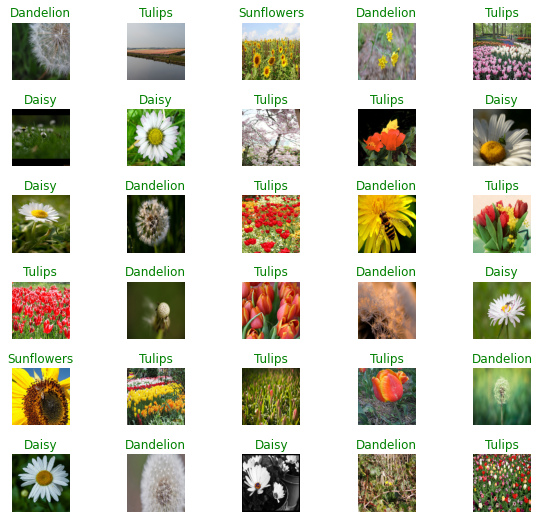

In [61]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    color = 'green' if p_ids[i] == l_ids[i] else 'red'
    plt.title(pcn[i].title(),color=color)
    plt.axis('off')
    